In [ ]:
!wget https://cb.lk/covid_19

In [ ]:
!unzip covid_19

In [ ]:
TRAIN_PATH="CovidDataset/Train"
VAL_PATH="CovidDataset/Val"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [ ]:
#CNN based model in KERAS
#CNN has multiple layers with each layer having some filters....It has a layered architecture
#We increase the filters as we go into the deep  of the model

model=Sequential()
#Our model is a sequential model
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#max pooling is used to fetch maximum features from the cnn layers
model.add(Dropout(0.25))
#dropout is used to prevent our model from over-fitting

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#adding dense layers ie a fully connected layer
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
#Output is only one neuron as we are doing binary classification

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])
#metrics of classification will be the accuracy matrix

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [ ]:
#Training Our Model...
train_datagen=image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_dataset=image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator=test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 60 images belonging to 2 classes.


In [ ]:
hist=model.fit_generator(
    train_generator,
    steps_per_epoch=7,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=2
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
7/7 [==============================] - 8s 1s/step - loss: 1.4207 - accuracy: 0.5000 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 8s 1s/step - loss: 0.6476 - accuracy: 0.6205 - val_loss: 0.6036 - val_accuracy: 0.8667
Epoch 3/10
7/7 [==============================] - 8s 1s/step - loss: 0.4412 - accuracy: 0.8170 - val_loss: 0.3022 - val_accuracy: 0.9333
Epoch 4/10
7/7 [==============================] - 8s 1s/step - loss: 0.3405 - accuracy: 0.8348 - val_loss: 0.2020 - val_accuracy: 0.9500
Epoch 5/10
7/7 [==============================] - 8s 1s/step - loss: 0.2392 - accuracy: 0.9196 - val_loss: 0.1362 - val_accuracy: 0.9833
Epoch 6/10
7/7 [==============================] - 8s 1s/step - loss: 0.1964 - accuracy: 0.9062 - val_loss: 0.0833 - val_accuracy: 0.9833
Epoch 7/10
7/7 [==============================] - 8s 1s/step - loss: 0.1268 - accuracy: 0.9598 - val_l

In [ ]:
model.save("model_adv.h5")

In [ ]:
model.evaluate_generator(train_generator)

In [ ]:
model.evaluate_generator(validation_generator)

[0.05536508560180664, 0.9666666388511658]

In [ ]:
model=load_model('model_adv.h5')

In [ ]:
import os

In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
y_actual=[]
y_test=[]

In [ ]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
  img=image.load_img("./CovidDataset/Val/Normal/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [ ]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
  img=image.load_img("./CovidDataset/Val/Normal/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [ ]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(y_actual,y_test)

In [ ]:
import seaborn as sb

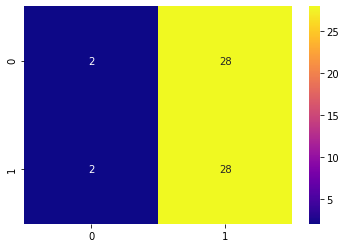

In [ ]:
sb.heatmap(cm,cmap="plasma",annot=True)

**NOW WE DO THE ABOVE MODEL USING RNN**

In [ ]:
# manual installation of PyTorch library
!pip3 install torch torchvision

import torchvision
import torchvision.transforms as transforms

import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import numpy as np

BATCH_SIZE = 64

# list all transformations
transform = transforms.Compose(
    [transforms.ToTensor()])

# download and load training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

# download and load testing dataset
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# parameters 
N_STEPS = 28
N_INPUTS = 28
N_NEURONS = 150
N_OUTPUTS = 10
N_EPHOCS = 10

In [ ]:
class ImageRNN(nn.Module):
    
    # declaraction of variables
    def __init__(self, batch_size, n_steps, n_inputs, n_neurons, n_outputs):
        super(ImageRNN, self).__init__()
        
        self.n_neurons = n_neurons
        self.batch_size = batch_size
        self.n_steps = n_steps
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        
        self.basic_rnn = nn.RNN(self.n_inputs, self.n_neurons) 
        
        self.FC = nn.Linear(self.n_neurons, self.n_outputs)
    
    # initialize hidden weights that have zero values
    def init_hidden(self,):
        # (num_layers, batch_size, n_neurons)
        return (torch.zeros(1, self.batch_size, self.n_neurons))
        
    def forward(self, X):
        # transforms X to dimensions: n_steps X batch_size X n_inputs
        X = X.permute(1, 0, 2) 
        
        self.batch_size = X.size(1)
        self.hidden = self.init_hidden()
        
        # lstm_out => n_steps, batch_size, n_neurons (hidden states for each time step)
        # self.hidden => 1, batch_size, n_neurons (final state from each lstm_out)
        lstm_out, self.hidden = self.basic_rnn(X, self.hidden)      
        out = self.FC(self.hidden)
        
        return out.view(-1, self.n_outputs) # batch_size X n_output

In [ ]:
 # Testing the model
      
dataiter = iter(trainloader)
images, labels = dataiter.next()
model = ImageRNN(BATCH_SIZE, N_STEPS, N_INPUTS, N_NEURONS, N_OUTPUTS)
logits = model(images.view(-1, 28,28))
print(logits[0:10])

In [ ]:
# Training the model
   
import torch.optim as optim

# Device: you can choose what device that you want to use during the training process
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Model instance
model = ImageRNN(BATCH_SIZE, N_STEPS, N_INPUTS, N_NEURONS, N_OUTPUTS)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

In [ ]:
for epoch in range(N_EPHOCS):  # loop over the dataset multiple times
    train_running_loss = 0.0
    train_acc = 0.0
    model.train()
    
    # TRAINING ROUND
    for i, data in enumerate(trainloader):
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # reset hidden states
        model.hidden = model.init_hidden() 
        
        # get the inputs
        inputs, labels = data
        inputs = inputs.view(-1, 28,28) 

        # forward + backward + optimize
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(outputs, labels, BATCH_SIZE)
         
    model.eval()
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' 
          %(epoch, train_running_loss/i, train_acc/i))
    
# TEST ACCURACY

test_acc = 0.0
for i, data in enumerate(testloader, 0):
    inputs, labels = data
    inputs = inputs.view(-1, 28, 28)

    outputs = model(inputs)

    test_acc += get_accuracy(outputs, labels, BATCH_SIZE)
        
print('Test Accuracy: %.2f'%(test_acc / i))

Epoch: 0 | Loss: 0.6522 | Train Accuracy: 79.43
Epoch: 1 | Loss: 0.2889 | Train Accuracy: 91.81
Epoch: 2 | Loss: 0.2196 | Train Accuracy: 93.79
Epoch: 3 | Loss: 0.1851 | Train Accuracy: 94.88
Epoch: 4 | Loss: 0.1612 | Train Accuracy: 95.55
Epoch: 5 | Loss: 0.1460 | Train Accuracy: 96.00
Epoch: 6 | Loss: 0.1350 | Train Accuracy: 96.26
Epoch: 7 | Loss: 0.1315 | Train Accuracy: 96.37
Epoch: 8 | Loss: 0.1190 | Train Accuracy: 96.64
Epoch: 9 | Loss: 0.1142 | Train Accuracy: 96.79
Test Accuracy: 96.70


**Comparison between CNN and RNN Models :-**

In [ ]:
cnn_acc=[50,85,78.33,95,96.67,96.67,96.67,96.67,91.67,98.33]
rnn_acc=[75.17,90.88,93.42,94.84,95.40,95.88,96.26,96.36,96.48,96.70]

In [ ]:
from matplotlib import pyplot as plt

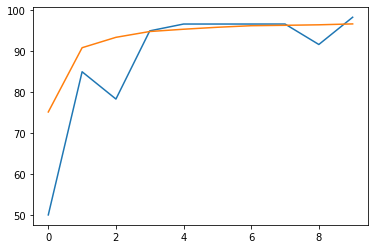

In [ ]:
plt.plot(cnn_acc) # blue one
plt.plot(rnn_acc) # yellow one